# Stabilität von Lösungsverfahren

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from odesolve import *

%load_ext autoreload
%autoreload 2

## Funktion der DGL

In [2]:
sigma = 10
rho = 28
beta = 8 / 3

def F(t, y):
        return np.array([ 
                sigma * (y[1] - y[0]),
                y[0] * (rho - y[2]) - y[1],
                y[0] * y[1] - beta * y[2]
        ])

## Lösung für alpha = 5

In [3]:
h = 0.01
alpha = 5
t, ya = rungekutta(F, [0, 40], h, [10, 10, 10])
t, yb = rungekutta(F, [0, 40], h, [10, 10, 10 + alpha]);

Plot beider Kurven

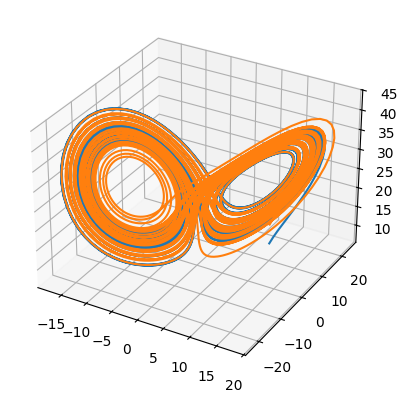

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(ya[:,0], ya[:,1], ya[:,2])
ax.plot(yb[:,0], yb[:,1], yb[:,2])

Vergleich

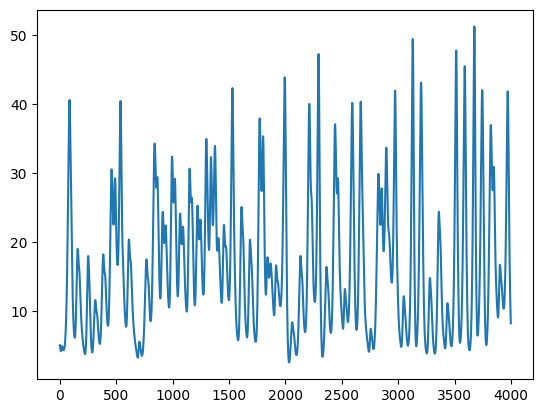

In [10]:
d = np.linalg.norm(yb - ya, axis=1)
plt.plot(d)

## Lösung für alpha = 1e-15

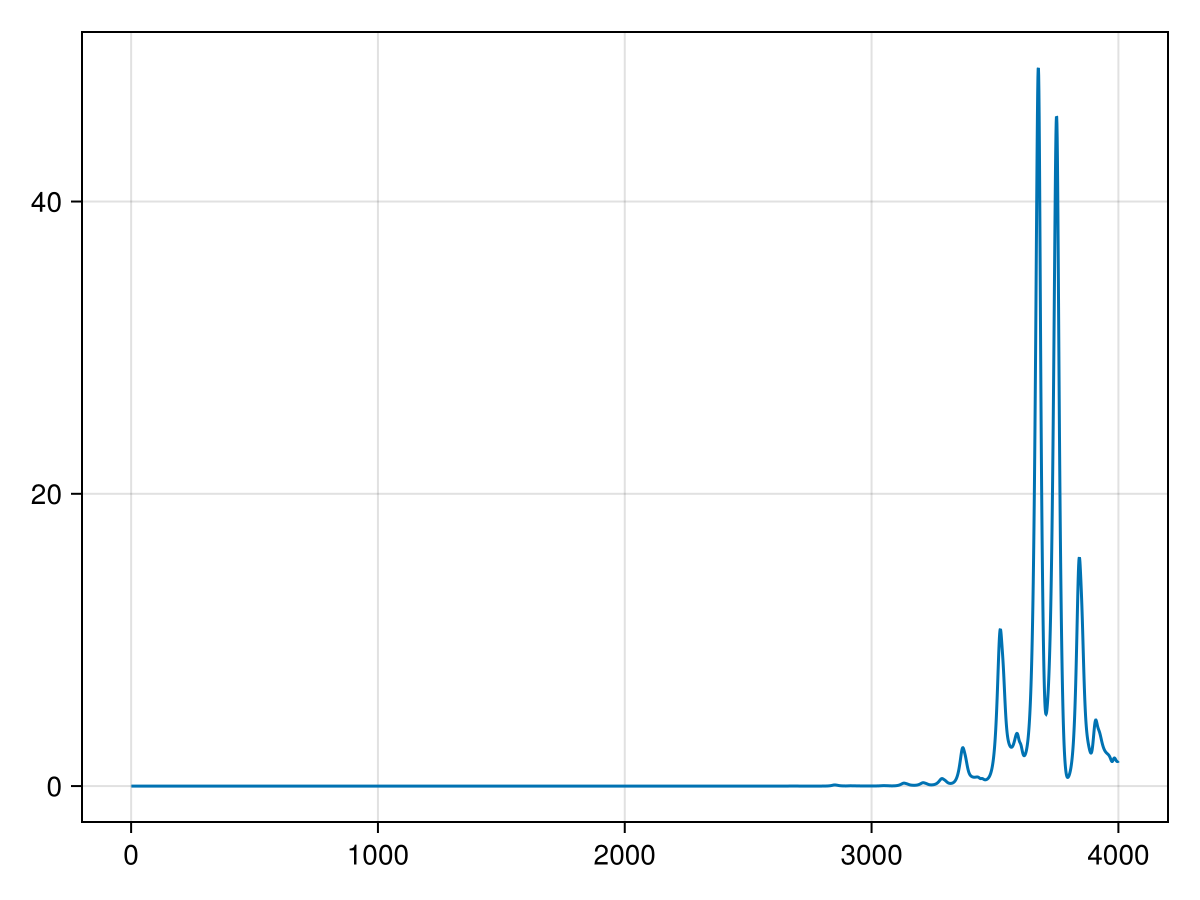

In [6]:
h = 0.01
alpha = 1e-15
t, ya = rungekutta(F, [0, 40], h, [10, 10, 10])
t, yb = rungekutta(F, [0, 40], h, [10, 10, 10 + alpha])

lines(norm.(eachrow(yb - ya)))